#Reading map file

In [9]:
import geopandas as gpd

<Axes: >

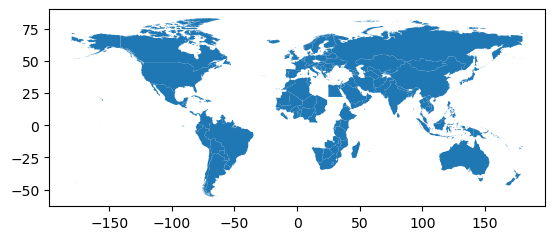

In [11]:
link="https://github.com/Mon-CSS/HW1/raw/refs/heads/main/maps/countriesCIA.gpkg"
Hwlink=gpd.read_file(link)
Hwlink.plot()

Getting the map data to plot

In [13]:
Bestcountries=Hwlink[Hwlink.tobacco_code + Hwlink.alcohol_code + Hwlink.obesity_code ==0]
## or
# countriesCIA[(countriesCIA.tobacco_code==0) & (countriesCIA.alcohol_code==0)] & (countriesCIA.obesity_code==0)

Bestcountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_code,obesity_levels,geometry
0,Afghanistan,Afghanistan,South Asia,0,23.3,0.01,0,1.very low,3.(15-30],0,1.very low,0,1.very low,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
13,Bangladesh,Bangladesh,South Asia,0,34.7,0.00,0,1.very low,4. (30-40],0,1.very low,0,1.very low,"MULTIPOLYGON (((92.26860 23.71944, 92.27805 23..."
17,Benin,Benin,Africa,0,6.9,1.25,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((2.73295 7.65821, 2.73222 7.651..."
26,Chad,Chad,Africa,0,8.3,0.55,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((14.19477 9.98175, 14.45055 9.9..."
31,Comoros,Comoros,Africa,0,20.3,0.18,0,1.very low,3.(15-30],0,1.very low,0,1.very low,"MULTIPOLYGON (((43.45361 -11.93611, 43.42750 -..."
42,Eritrea,Eritrea,Africa,0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13..."
44,Ethiopia,Ethiopia,Africa,0,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((45.48940 5.48976, 45.37447 5.3..."
49,Ghana,Ghana,Africa,0,3.5,1.59,0,1.very low,1. below5,0,1.very low,0,1.very low,"MULTIPOLYGON (((0.32238 6.03584, 0.35375 6.023..."
66,Kenya,Kenya,Africa,0,11.1,1.68,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((33.92110 -1.00194, 33.92333 -0..."
79,Madagascar,Madagascar,Africa,0,27.8,0.89,0,1.very low,3.(15-30],0,1.very low,0,1.very low,"MULTIPOLYGON (((46.32916 -15.64500, 46.33167 -..."


Trying to find best countries in world map 

<Axes: >

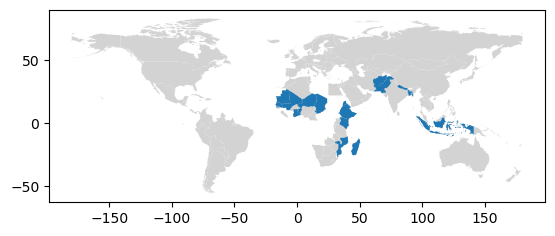

In [15]:
base=Hwlink.plot(color='lightgrey')
Bestcountries.plot(ax=base)

<Axes: >

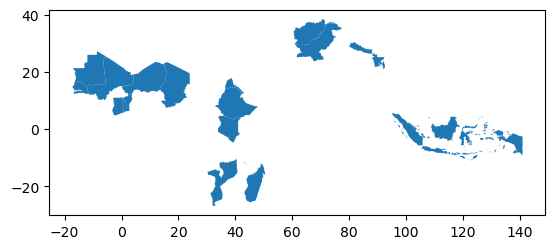

In [17]:
Hwlink[Hwlink.tobacco_code + Hwlink.alcohol_code + Hwlink.obesity_code ==0].plot()

Finding polygons within the rectangles 

<Axes: >

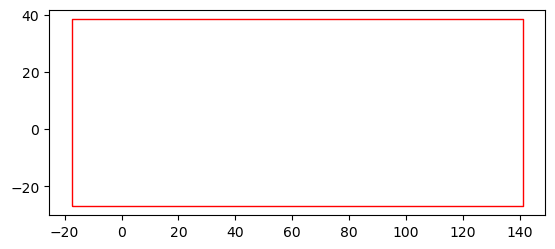

In [19]:
maskToClip=Bestcountries.dissolve().envelope
maskToClip.plot(color='white', edgecolor='red')

Creating new map

In [21]:

import matplotlib.pyplot as plt


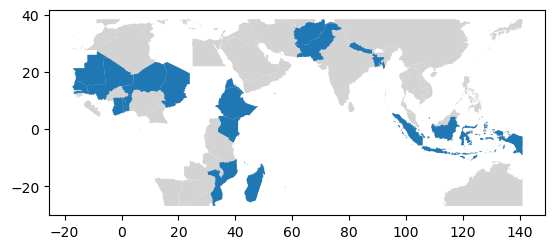

In [23]:
miniworld=Hwlink.clip(maskToClip)
base=miniworld.plot(color='lightgrey')
Bestcountries.plot(ax=base)
plt.show()

Getting the coordinates and names of best countries 

In [25]:
allCoords=[x.coords[:][0] for x in Bestcountries.representative_point()]
allCoords

[(65.2007869412316, 33.93967628479004),
 (89.86420373323239, 23.68562126159668),
 (2.295148254642566, 9.310901641845703),
 (18.55982626888577, 15.439477920532227),
 (44.40715428970263, -12.222640037536621),
 (38.0874970729557, 15.17777681350708),
 (38.99488193529696, 9.13499927520752),
 (-1.0788641062852107, 7.919823169708252),
 (37.466270086052546, -0.024069894105196),
 (46.724499132603114, -18.755695343017578),
 (-0.7343858289118264, 17.56208038330078),
 (-11.471204741016852, 21.010009765625),
 (72.95304096919, 4.433540105819702),
 (34.68054759272592, -18.64375114440918),
 (9.8919770923853, 17.56208038330078),
 (83.08470576645198, 28.399438858032227),
 (70.10362268259902, 30.374436378479004),
 (-14.659253915593727, 14.4959716796875),
 (103.82054994412292, 1.3497220277786255),
 (1.0334488223151097, 8.643054485321045),
 (113.31943959775188, 0.0895843505859375)]

Creating new columns with new coordinates

In [27]:
Bestcountries=Bestcountries.assign(coordinates=allCoords)
Bestcountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_code,obesity_levels,geometry,coordinates
0,Afghanistan,Afghanistan,South Asia,0,23.3,0.01,0,1.very low,3.(15-30],0,1.very low,0,1.very low,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35...","(65.2007869412316, 33.93967628479004)"
13,Bangladesh,Bangladesh,South Asia,0,34.7,0.00,0,1.very low,4. (30-40],0,1.very low,0,1.very low,"MULTIPOLYGON (((92.26860 23.71944, 92.27805 23...","(89.86420373323239, 23.68562126159668)"
17,Benin,Benin,Africa,0,6.9,1.25,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((2.73295 7.65821, 2.73222 7.651...","(2.295148254642566, 9.310901641845703)"
26,Chad,Chad,Africa,0,8.3,0.55,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((14.19477 9.98175, 14.45055 9.9...","(18.55982626888577, 15.439477920532227)"
31,Comoros,Comoros,Africa,0,20.3,0.18,0,1.very low,3.(15-30],0,1.very low,0,1.very low,"MULTIPOLYGON (((43.45361 -11.93611, 43.42750 -...","(44.40715428970263, -12.222640037536621)"
42,Eritrea,Eritrea,Africa,0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13...","(38.0874970729557, 15.17777681350708)"
44,Ethiopia,Ethiopia,Africa,0,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((45.48940 5.48976, 45.37447 5.3...","(38.99488193529696, 9.13499927520752)"
49,Ghana,Ghana,Africa,0,3.5,1.59,0,1.very low,1. below5,0,1.very low,0,1.very low,"MULTIPOLYGON (((0.32238 6.03584, 0.35375 6.023...","(-1.0788641062852107, 7.919823169708252)"
66,Kenya,Kenya,Africa,0,11.1,1.68,0,1.very low,2.(5-15],0,1.very low,0,1.very low,"MULTIPOLYGON (((33.92110 -1.00194, 33.92333 -0...","(37.466270086052546, -0.024069894105196)"
79,Madagascar,Madagascar,Africa,0,27.8,0.89,0,1.very low,3.(15-30],0,1.very low,0,1.very low,"MULTIPOLYGON (((46.32916 -15.64500, 46.33167 -...","(46.724499132603114, -18.755695343017578)"


Plotting non-interactive map

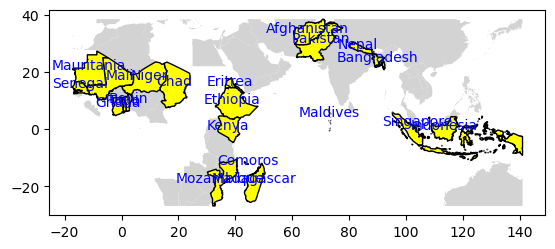

In [31]:
base=miniworld.plot(color='lightgrey')
Bestcountries.plot(color='yellow', edgecolor='black',ax=base)
for idx, row in Bestcountries.iterrows():
   plt.annotate(text=row['name'], xy=row['coordinates'], horizontalalignment='center', color='blue')
